   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1


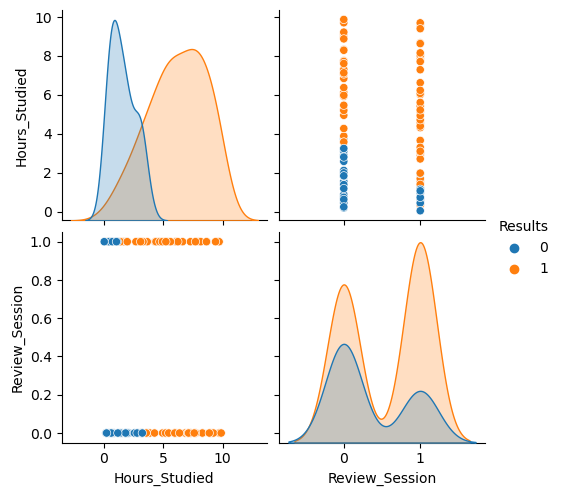

Coefficients: [1.40365599 1.42846816]
Intercept: -4.581361227231424
Accuracy: 0.85
AUC: 0.9642857142857144


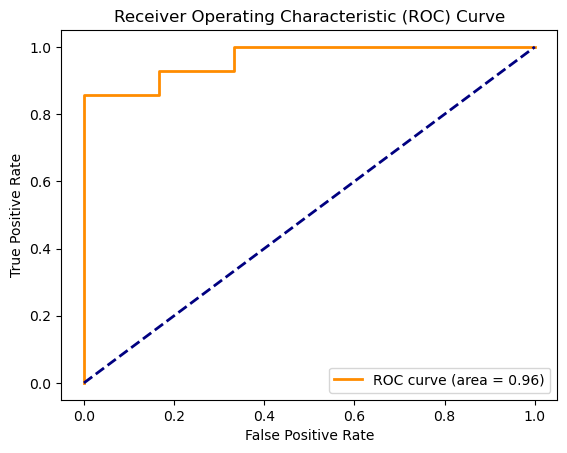

In [6]:
import warnings

# Suppress seaborn warning about figure layout change
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv("student_data.csv")

# Explore the dataset
print(data.head())

# Visualize the data
sns.pairplot(data, hue=data.columns[-1])  # Assuming the target variable is the last column
plt.show()

# Prepare data for modeling
X = data.drop(data.columns[-1], axis=1)  # Features
y = data[data.columns[-1]]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Output model coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and output accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate and output AUC and plot ROC curve
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [3]:
#task1a
import numpy as np

# Given coefficients and values
intercept = -3
coef_hours_studied = 0.8
coef_review_session = 1.5

# 1. Thomas studied for two hours and did not attend the review session.
hours_studied_1 = 2
review_session_1 = 0

log_odds_1 = intercept + coef_hours_studied * hours_studied_1 + coef_review_session * review_session_1
odds_1 = np.exp(log_odds_1)
likelihood_1 = 1 / (1 + np.exp(-log_odds_1))

# 2. If Thomas goes to the review session.
review_session_2 = 1
log_odds_2 = intercept + coef_hours_studied * hours_studied_1 + coef_review_session * review_session_2
odds_2 = np.exp(log_odds_2)
likelihood_2 = 1 / (1 + np.exp(-log_odds_2))

# 3. If Thomas studied more or less hours.
hours_studied_3 = 8
log_odds_3 = intercept + coef_hours_studied * hours_studied_3 + coef_review_session * review_session_1
odds_3 = np.exp(log_odds_3)
likelihood_3 = 1 / (1 + np.exp(-log_odds_3))

# Print results
print("1. Thomas studied for two hours and did not attend the review session:")
print("   (1) Log Odds:", log_odds_1)
print("   (2) Odds:", odds_1)
print("   (3) Likelihood of Passing:", likelihood_1)

print("\n2. If Thomas goes to the review session:")
print("   (1) Log Odds:", log_odds_2)
print("   (2) Odds:", odds_2)
print("   (3) Likelihood of Passing:", likelihood_2)

print("\n3. If Thomas studied 8 hours and did not attend the review session:")
print("   (1) Log Odds:", log_odds_3)
print("   (2) Odds:", odds_3)
print("   (3) Likelihood of Passing:", likelihood_3)


1. Thomas studied for two hours and did not attend the review session:
   (1) Log Odds: -1.4
   (2) Odds: 0.2465969639416065
   (3) Likelihood of Passing: 0.19781611144141825

2. If Thomas goes to the review session:
   (1) Log Odds: 0.10000000000000009
   (2) Odds: 1.1051709180756477
   (3) Likelihood of Passing: 0.52497918747894

3. If Thomas studied 8 hours and did not attend the review session:
   (1) Log Odds: 3.4000000000000004
   (2) Odds: 29.964100047397025
   (3) Likelihood of Passing: 0.9677045353015495


   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1


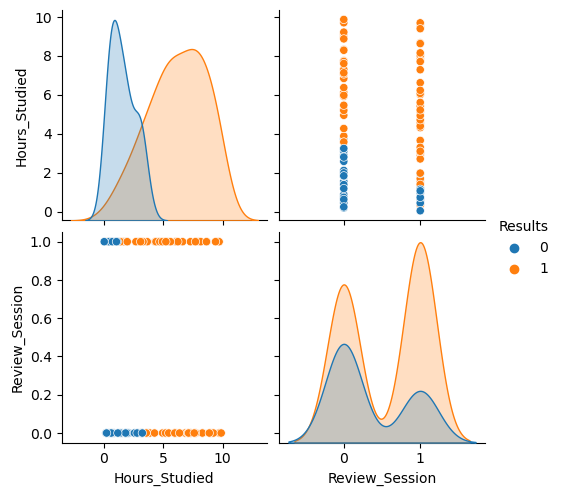

Linear SVM Accuracy: 0.85
RBF SVM Accuracy: 0.85
Best Parameters for RBF SVM: {'C': 1, 'gamma': 1}
Confusion Matrix (RBF SVM):
[[ 5  1]
 [ 2 12]]

Classification Report (RBF SVM):
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



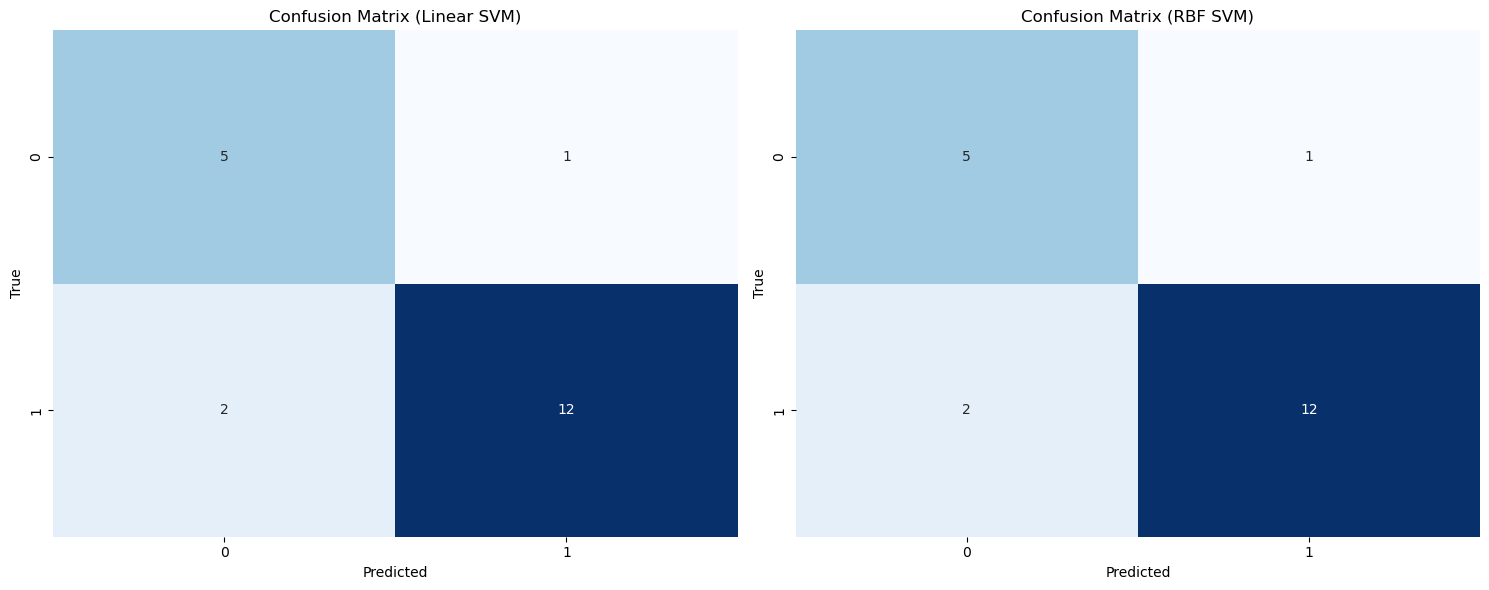

In [5]:
import warnings

# Suppress seaborn warning about figure layout change
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("student_data.csv")

# Explore the dataset
print(data.head())

# Visualize the data
sns.pairplot(data, hue=data.columns[-1], height=2.5)  # Adjust height if needed
plt.show()

# Prepare data for modeling
X = data.drop(data.columns[-1], axis=1)  # Features
y = data[data.columns[-1]]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear SVM model
linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_svm_model.predict(X_test)

# Calculate and output accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {accuracy_linear}")

# Fit an SVM model with RBF kernel using grid search for gamma
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
rbf_svm_model = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
rbf_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = rbf_svm_model.predict(X_test)

# Calculate and output accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM Accuracy: {accuracy_rbf}")

# Output best parameters from grid search
print(f"Best Parameters for RBF SVM: {rbf_svm_model.best_params_}")

# Output other evaluation metrics
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
class_report_rbf = classification_report(y_test, y_pred_rbf)

print("Confusion Matrix (RBF SVM):")
print(conf_matrix_rbf)

print("\nClassification Report (RBF SVM):")
print(class_report_rbf)

# Visualize the results
plt.figure(figsize=(15, 6))  # Increase the figure size

# Plot Linear SVM Results
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Linear SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot RBF SVM Results
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (RBF SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()
